# Gradient-based solver for ridge regression

In this notebook, you will create a **gradient descent** solver for **ridge regression** and then compare it to the built-in solver in `sklearn.linear_model`.

## 1. Set up notebook and create data set

After loading in some standard packages, we create a synthetic data set consisting of data points `(x,y)`:
* `x`: 100-dimensional vector whose coordinates are independent draws from a standard normal (Gaussian) distribution
* `y`: response value given by `y = wx + e` where `w` is a target regression function and `e` is Gaussian noise

We will fix `w` to be the 100-dimensional vector whose first ten coordinates are exactly 1.0, and whose remaining coordinates are zero. Thus only the first ten coordinates of `x` are relevant to the regression task.

In [94]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The following procedure, **generate_data**, creates a data set of a specified number of points. It is invoked as follows:
* `trainx, trainy = generate_data(n)`

Here:
* `n` is the target number of points
* `trainx`: `nx100` array of data points
* `trainy`: array of `n` response values

In [364]:
def generate_data(n):
    d = 100
    w = np.zeros(d)
    for i in range(0,10):
        w[i] = 1.0
    #
    trainx = np.random.normal(size=(n,d))
    e = np.random.normal(size=(n))
    trainy = np.dot(trainx, w) + e
    #
    return trainx, trainy

## 2. Gradient descent solver for ridge regression

<font color="magenta">**For you to do:**</font> Define a procedure, **ridge_regression_GD**, that uses gradient descent to solve the ridge regression problem. It is invoked as follows:

* `w,b,losses = ridge_regression_GD(x,y,C)`

Here, the input consists of:
* training data `x,y`, where `x` and `y` are numpy arrays of dimension `n`-by-`d` and `n`, respectively (if there are `n` training points)
* regularization constant `C`

The function should find the `d`-dimensional vector `w` and offset `b` that minimize the ridge regression loss function (with regularization constant `C`), and return:
* `w` and `b`
* `losses`, an array containing the ridge regression loss at each iteration

<font color="magenta">Advice:</font> First figure out the derivative, which has a relatively simple form. Next, when implementing gradient descent, think carefully about two issues.

1. What is the step size?
2. When has the procedure converged?

Take the time to experiment with different ways of handling these.

1st derivative wrt b:

$$ {dL\over db} = 2\sum_{i}^{n} (y^i - (w \cdot x^i + b))  $$

1st derivative wrt w:

$$ {dL\over dw} = -2\sum_{i}^{n} (y^i - (w \cdot x^i + b))x + 2\lambda w  $$

In [367]:
def ridge_regression_GD(x,y,C):
    #define w,b and loss function 1st
    d=100
    w = np.zeros(d)
    for i in range (0,10):
        w[i] = 1.0
    n=np.shape(x)[0]
    b=np.zeros(n)
    #loss_func = -2 * np.sum(y-(np.dot(w,x)+b)*x + 2*C*np.dot(w,w)
    print("x:", np.shape(x), "y:", np.shape(y), "w:", np.shape(w), "b:", np.shape(b))
    total_iter = 1000
    #eta = 1/total_iter
    eta = 0.001    
    losses = np.zeros(total_iter)
    for iter in range(total_iter):
        r = y - (np.dot(x,w) + b)
        dL = -2*np.sum(np.dot(x.T, r)) + 2*C*w
        w = w - eta*dL
        losses[iter] = np.dot(dL,dL)
        if losses[iter-1] <= losses[iter]:
            new_eta = eta/2
            print("On", iter, "iteration: ETA reduced from ", eta, "to ", new_eta, losses[iter-1], losses[iter])
            eta = new_eta
        
        if losses[iter] < 50:
            print("Converged after:", iter, "iterations, with ETA:", eta, ", Losses: ", losses[iter])
            break              

    return w, b, losses

Let's try it out and print a graph of the loss values during the optimization process.

x: (200, 100) y: (200,) w: (100,) b: (200,)
On 0 iteration: ETA reduced from  0.001 to  0.0005 0.0 4164805.6337424023
On 1 iteration: ETA reduced from  0.0005 to  0.00025 4164805.6337424023 7220394911.922081
On 2 iteration: ETA reduced from  0.00025 to  0.000125 7220394911.922081 2982456305724.3916
On 3 iteration: ETA reduced from  0.000125 to  6.25e-05 2982456305724.3916 278417808637913.97
On 4 iteration: ETA reduced from  6.25e-05 to  3.125e-05 278417808637913.97 5222293449353476.0
On 5 iteration: ETA reduced from  3.125e-05 to  1.5625e-05 5222293449353476.0 1.4485542215832776e+16
Converged after: 21 iterations, with ETA: 1.5625e-05 , Losses:  46.60295005174004


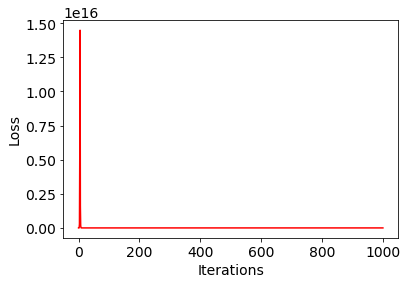

In [368]:
# Generate 200 data points
n = 200
x,y = generate_data(n)
# Set regularization constant
C = 1.0
# Run gradient descent solver
w, b, losses = ridge_regression_GD(x,y,C)
# Plot the losses
plt.plot(losses,'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

<font color="magenta">**Something to think about**</font>

1. In setting the step size, does it work to use a fixed schedule 1/t? Why or why not? No, the step size is too big, it overshoots and does not converge.

2. Can you set up the gradient descent procedure in such a way that on each iteration, the loss monotonically decreases? Yes, use a very small step size and a very large total_iter


## 3. Evaluate the gradient descent solver

Now let's compare the regressor found by your gradient descent procedure to that returned by the built-in ridge regression solver in `sklearn`. We will compare them in two ways:
* Their MSE values
* The distance between the corresponding `w`-vectors

The latter should be smaller than 10^{-4}.


In [369]:
def compute_mse(w,b,x,y):
    residuals = y - (np.dot(x, w) + b)
    return np.dot(residuals, residuals)/n

In [370]:
# Generate 200 data points
n = 200
x,y = generate_data(n)
# Set regularization constant
C = 10.0
# Run gradient descent solver and compute its MSE
w, b, losses = ridge_regression_GD(x,y,C)
# Use built-in routine for ridge regression and compute MSE
regr = linear_model.Ridge(alpha=C)
regr.fit(x, y)
# Print MSE values and L2 distance between the regression functions
print ("MSE of gradient descent solver: ", compute_mse(w,b,x,y))
print ("MSE of built-in solver: ", mean_squared_error(regr.predict(x), y))
print ("Distance between w-coefficients: ", np.linalg.norm(w-regr.coef_))

x: (200, 100) y: (200,) w: (100,) b: (200,)
On 0 iteration: ETA reduced from  0.001 to  0.0005 0.0 1186248.7939708033
On 1 iteration: ETA reduced from  0.0005 to  0.00025 1186248.7939708033 1961646211.6414804
On 2 iteration: ETA reduced from  0.00025 to  0.000125 1961646211.6414804 780961508695.4368
On 3 iteration: ETA reduced from  0.000125 to  6.25e-05 780961508695.4368 70116059411818.91
On 4 iteration: ETA reduced from  6.25e-05 to  3.125e-05 70116059411818.91 1259144958138359.8
On 5 iteration: ETA reduced from  3.125e-05 to  1.5625e-05 1259144958138359.8 3299781489261433.5
MSE of gradient descent solver:  1.4866587607113688
MSE of built-in solver:  0.5974723625047447
Distance between w-coefficients:  0.9116043485614295


<font color="magenta">**Something to think about**</font>

The data was originally generated using a linear function in which only ten of the 100 features (the first ten) were relevant. Does the vector `w` returned by ridge regression correctly identify the relevant features?